In [130]:
# importation des packages
import numpy as np
import pandas as pd
import seaborn as sns

# importation des modules
import matplotlib.pyplot as plt
import scipy.stats as sps
import mysql.connector as sql

# magic
import warnings
warnings.filterwarnings('ignore')

db_connection = sql.connect(host='mysql.ozna.me', user='pnr1', password='groupesaepnr1', database='PNR', port='3306')

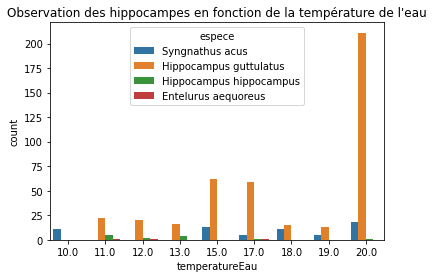

In [131]:
# 1 - Observation des hippocampes en fonction de la température de l'eau

attributs = "temperatureEau, espece"
df = pd.read_sql(f"SELECT {attributs} FROM Obs_Hippocampe JOIN Observation ON obsH = idObs", con=db_connection)

sns.countplot(x='temperatureEau', hue='espece', data=df)
plt.title("Observation des hippocampes en fonction de la température de l'eau")
print()


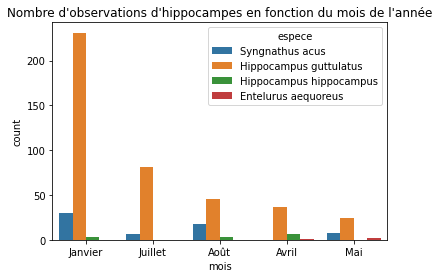

In [132]:
# 2 - Observation des hippocampes en fonction du mois de l'année

attributs = "MONTH(dateObs) mois, espece"
restriction = "temperatureEau IS NOT NULL"
df = pd.read_sql(f"SELECT {attributs} FROM Obs_Hippocampe JOIN Observation ON obsH = idObs WHERE {restriction}", con=db_connection)

filter = {
    1:"Janvier",
    2:"Février",
    3:"Mars",
    4:"Avril",
    5:"Mai",
    6:"Juin",
    7:"Juillet",
    8:"Août",
    9:"Septembre",
    10:"Octobre",
    11:"Novembre",
    12:"Décembre"
}

sns.countplot(x='mois', hue='espece', data=df.replace(filter))
plt.title("Nombre d'observations d'hippocampes en fonction du mois de l'année")
print()


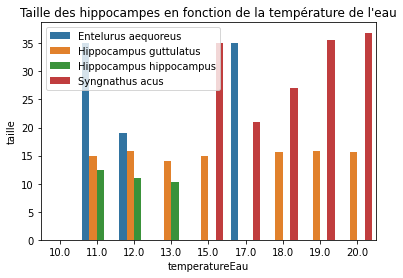

In [12]:
df = pd.read_sql("SELECT espece, temperatureEau, taille FROM Obs_Hippocampe", con=db_connection)
new_df = df.groupby(["espece", "temperatureEau"])[["taille"]].mean().reset_index()
new_df

sns.barplot(x='temperatureEau', y='taille', hue='espece', data=new_df)
plt.legend(loc='upper left')
plt.title("Taille des hippocampes en fonction de la température de l'eau")
print()